In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from clean3 import clean_games

Let's clean & load our data. For time's sake, we're only going to use years 1990-2020.

In [2]:
df = clean_games("data/games.pickle", start_year=1990)

In [26]:
game_df = df.copy()

In [27]:
game_df.shape

(5971, 218)

In [28]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 73)

In [29]:
# print all columns
[col for col in game_df.columns]

['game_id',
 'season_year',
 'week_num',
 'team_year',
 'full_game_date',
 'team',
 'decade',
 'opp',
 'game_day_of_week',
 'game_outcome',
 'pts_off',
 'margin',
 'pts_def',
 'pass_cmp',
 'pass_att',
 'pass_yds',
 'pass_td',
 'pass_int',
 'pass_sacked',
 'pass_sacked_yds',
 'pass_yds_per_att',
 'pass_net_yds_per_att',
 'pass_cmp_perc',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_yds_per_att',
 'rush_td',
 'fgm',
 'fga',
 'xpm',
 'xpa',
 'punt',
 'punt_yds',
 'overtime',
 'time_of_poss',
 'third_down_success',
 'third_down_att',
 'fourth_down_success',
 'fourth_down_att',
 'team_home_game',
 'team_home_game_def',
 'pass_cmp_def',
 'pass_att_def',
 'pass_yds_def',
 'pass_td_def',
 'pass_int_def',
 'pass_sacked_def',
 'pass_sacked_yds_def',
 'pass_yds_per_att_def',
 'pass_net_yds_per_att_def',
 'pass_cmp_perc_def',
 'pass_rating_def',
 'rush_att_def',
 'rush_yds_def',
 'rush_yds_per_att_def',
 'rush_td_def',
 'fgm_def',
 'fga_def',
 'third_down_success_def',
 'third_down_att_def',
 

## Combine Features Here

In [30]:
# total touchdowns
game_df['ewma_td'] = game_df['ewma_rush_td'] + game_df['ewma_pass_td']

game_df['ewma_td_def'] = \
    game_df['ewma_rush_td_def'] + game_df['ewma_pass_td_def']


game_df['ewma_td_opp'] = game_df['ewma_rush_td_opp'] + game_df['ewma_pass_td_opp']

game_df['ewma_td_def_opp'] = \
    game_df['ewma_rush_td_def_opp'] + game_df['ewma_pass_td_def_opp']

In [31]:
# game_df['ewma_third_conv_pct'] = game_df['ewma_third_down_success'] / game_df['ewma_third_down_att']

# game_df['ewma_third_conv_pct_def'] = \
#     game_df['ewma_third_down_success_def'] / game_df['ewma_third_down_att_def']


# game_df['ewma_third_conv_pct_opp'] = game_df['ewma_third_down_success_opp'] / game_df['ewma_third_down_att_opp']

# game_df['ewma_third_conv_pct_def_opp'] = \
#     game_df['ewma_third_down_success_def_opp'] / game_df['ewma_third_down_att_def_opp']

In [32]:
# margin * win?
game_df['ewma_margin_win'] = game_df['ewma_margin'] * game_df['ewma_result_win']
game_df['ewma_margin_win_opp'] = game_df['ewma_margin_opp'] * game_df['ewma_result_win_opp']

In [33]:
# # total yds

# game_df['ewma_total_yds_off'] = game_df['ewma_pass_yds'] + game_df['ewma_pass_td']

# game_df['ewma_total_yds_def'] = \
#     game_df['ewma_pass_yds_def'] + game_df['ewma_pass_yds_opp']


# game_df['ewma_total_yds_off_opp'] = game_df['ewma_pass_yds_opp'] + game_df['ewma_rush_yds_opp']

# game_df['ewma_total_yds_def_opp'] = \
#     game_df['ewma_pass_yds_def_opp'] + game_df['ewma_rush_yds_def_opp']




## Plot features vs. Target Here

In [34]:
selected_columns = [
'team_home_game',
'ewma_team_home_game',
'ewma_pass_rating',
'ewma_pass_rating_def',
'ewma_margin_opp',
'ewma_margin',
'ewma_pass_yds',
'ewma_pass_yds_def',
'ewma_pass_td_opp',
'ewma_rush_td',
'ewma_result_win_opp',
'ewma_pass_att_def',
'ewma_third_conv_pct',    
'ewma_pass_cmp_perc_def_opp',
'ewma_pass_cmp_perc_def',
]

<AxesSubplot:>

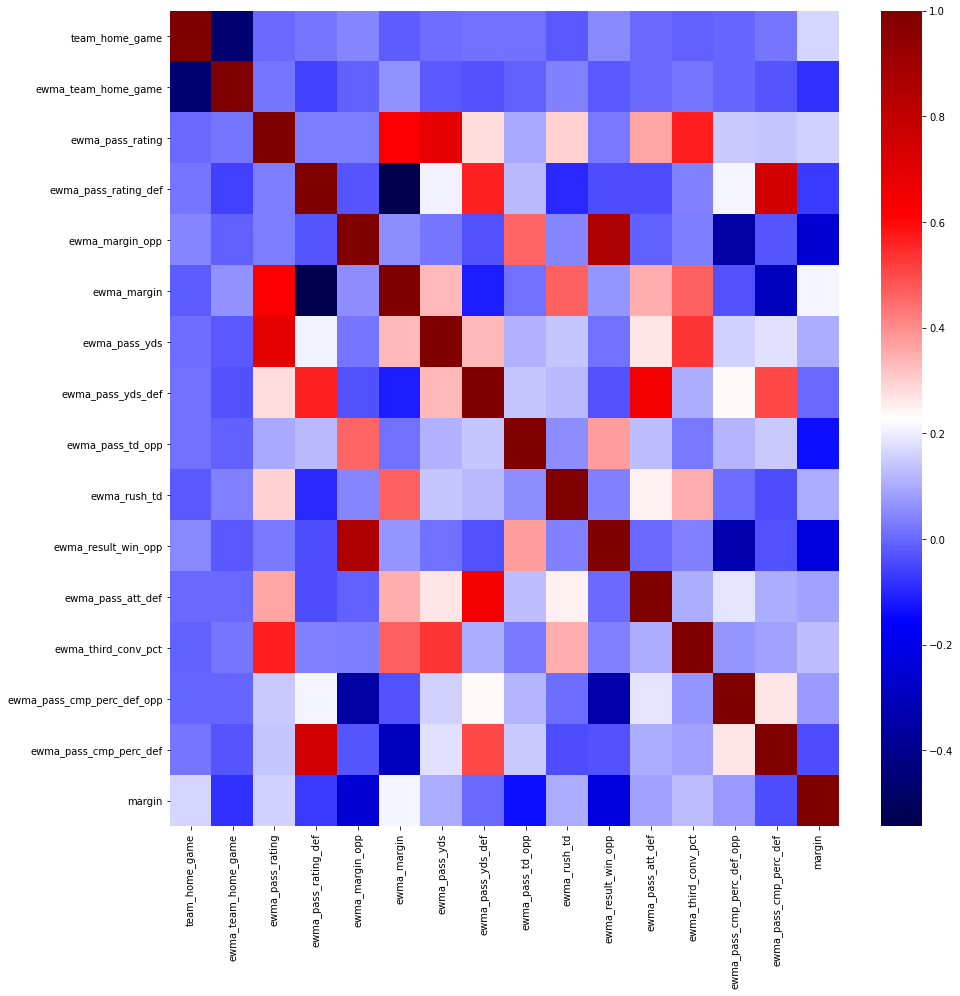

In [35]:
plot_cols = [c for c in selected_columns]
plot_cols.append('margin')

# later think about pairplot,
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(game_df[plot_cols].corr(), cmap='seismic', annot=False)

In [36]:
# 



In [37]:
X = game_df[selected_columns]
y = game_df['margin']

In [38]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

Our DF is still too large to use `df.info()`. 

Let's split the columns into sections. Since we have so many columns, we need to do quite a bit of splitting.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

# pass in train set
def split_and_validate(X, y):
    '''
        For a set of features and target X, y, perform a ~80/20 train/val split, 
        fit and validate a linear regression model, and report results
    '''

    # perform train/val split
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    
    # if we switch to use Lasso/Ridge CV models, we will only use the split below for simple linreg
    # (RidgeCV/LassoCV will do the K-Fold for us)
    # DON'T USE TEST DATA HERE!
    X_train, X_val, y_train, y_val = \
        train_test_split(X_train_val, y_train_val, test_size=0.18, random_state=42)
    
    # standard scaler resulting in lower R^2
    scaler = StandardScaler()
    
    # fit_transform does both fit & transform (de-mean & divide by std dev)
    X_train_scaled = scaler.fit_transform(X_train.values) # fits, stores the data, and transforms
    X_val_scaled = scaler.transform(X_val.values)
    X_test_scaled = scaler.transform(X_test.values)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # for pol                         
    # fit simple poly regression to training data (not working)
#     poly = PolynomialFeatures(degree=2)
#     X_train_poly = poly.fit_transform(X_train.values)
#     X_val_poly = poly.transform(X_val.values)
#     X_test_poly = poly.transform(X_test.values)
#     lm_poly = LinearRegression()
#     lm_poly.fit(X_train_poly, y_train)
    
    # LJ advice - use RidgeCV    
    # fit ridge regression to training data    
    ridge = RidgeCV()
    ridge.fit(X_train_scaled, y_train)
    
    # lasso model results very poor
    # fit lasso regression to training data
    lasso = Lasso()
    lasso.fit(X_train_scaled, y_train)
    
    # score fit model on validation data
    lr_val_score = lr_model.score(X_val_scaled, y_val)
    ridge_val_score = ridge.score(X_train_val, y_train_val)
    lasso_val_score = lasso.score(X_train_val, y_train_val)
#     lm_poly_val_score = lm_poly.score(X_val_poly, y_val)
    
    # report results
    print('\nSIMPLE Validation R^2 score was:', lr_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    
    print('\nRIDGE Validation R^2 score was:', ridge_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, ridge.coef_):
        print(feature, ':', f'{coef:.2f}') 
        
    print('\nLASSO Validation R^2 score was:', lasso_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lasso.coef_):
        print(feature, ':', f'{coef:.2f}') 
    
    return lr_model

In [40]:
def ridge_KFold(X, y):
    pass

In [41]:
X = game_df[selected_columns]
y = game_df['margin']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = Lasso()
poly = PolynomialFeatures()
p = poly.fit_transform(X_train_val, y_train_val)





In [42]:
def model2(X, y):
    pass

In [43]:
# let's try all of our columns at once.

all_stats = [
 'season_year',
 'week_num', 
 'team_home_game',
 'ewma_fga',
 'ewma_fga_def',
 'ewma_fga_def_opp',
 'ewma_fga_opp',
 'ewma_fgm',
 'ewma_fgm_def',
 'ewma_fgm_def_opp',
 'ewma_fgm_opp',
 'ewma_margin',
 'ewma_margin_opp',
 'ewma_pass_att',
 'ewma_pass_att_def',
 'ewma_pass_att_def_opp',
 'ewma_pass_att_opp',
 'ewma_pass_cmp',
 'ewma_pass_cmp_def',
 'ewma_pass_cmp_def_opp',
 'ewma_pass_cmp_opp',
 'ewma_pass_cmp_perc',
 'ewma_pass_cmp_perc_def',
 'ewma_pass_cmp_perc_def_opp',
 'ewma_pass_cmp_perc_opp',
 'ewma_pass_int',
 'ewma_pass_int_def',
 'ewma_pass_int_def_opp',
 'ewma_pass_int_opp',
 'ewma_pass_net_yds_per_att_def',
 'ewma_pass_net_yds_per_att_def_opp',
 'ewma_pass_rating',
 'ewma_pass_rating_def',
 'ewma_pass_rating_def_opp',
 'ewma_pass_rating_opp',
 'ewma_pass_sacked',
 'ewma_pass_sacked_def',
 'ewma_pass_sacked_def_opp',
 'ewma_pass_sacked_opp',
 'ewma_pass_sacked_yds',
 'ewma_pass_sacked_yds_def',
 'ewma_pass_sacked_yds_def_opp',
 'ewma_pass_sacked_yds_opp',
 'ewma_pass_td',
 'ewma_pass_td_def',
 'ewma_pass_td_def_opp',
 'ewma_pass_td_opp',
 'ewma_pass_yds',
 'ewma_pass_yds_opp',
 'ewma_pass_yds_per_att',
 'ewma_pass_yds_per_att_def',
 'ewma_pass_yds_per_att_def_opp',
 'ewma_pass_yds_per_att_opp',
 'ewma_pts_def',
 'ewma_pts_def_opp',
 'ewma_pts_off',
 'ewma_pts_off_opp',
 'ewma_result_tie',
 'ewma_result_tie_opp',
 'ewma_result_win',
 'ewma_result_win_opp',
 'ewma_rush_att',
 'ewma_rush_att_def',
 'ewma_rush_att_def_opp',
 'ewma_rush_att_opp',
 'ewma_rush_td',
 'ewma_rush_td_def',
 'ewma_rush_td_def_opp',
 'ewma_rush_td_opp',
 'ewma_rush_yds',
 'ewma_rush_yds_def',
 'ewma_rush_yds_def_opp',
 'ewma_rush_yds_opp',
 'ewma_rush_yds_per_att',
 'ewma_rush_yds_per_att_def',
 'ewma_rush_yds_per_att_def_opp',
 'ewma_rush_yds_per_att_opp',
 'ewma_third_down_att',
 'ewma_third_down_att_def',
 'ewma_third_down_att_def_opp',
 'ewma_third_down_att_opp',
 'ewma_third_down_success',
 'ewma_third_down_success_def',
 'ewma_third_down_success_def_opp',
 'ewma_third_down_success_opp',
 'prev_result_win',
 'prev_result_win_opp',
 'roll3_wins',
 'roll3_wins_opp',
 'ewma_to_off', 
 'ewma_to_def', 
 'ewma_to_off_opp',
 'ewma_to_def_opp',
]


In [44]:

# game_df = game_df.dropna(subset=all_stats
#                          .append('margin'), how='any', inplace=True)
X = game_df[all_stats]
y = game_df['margin']

model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()
# X.describe()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     45.66
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          4.65e-124
Time:                        22:01:04   Log-Likelihood:                -14439.
No. Observations:                3582   AIC:                         2.891e+04
Df Residuals:                    3566   BIC:                         2.901e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.0259      4.927     -0.411      0.681     -11.686       7.634
team_home_game                 5.7791      0.519     11.128      0.000       4.761       6.797
ewma_team_home_game           -3.0375      2.771     -1.096      0.273      -8.471       2.396
ewma_pass_rating               0.0471      0.030      1.568      0.117      -0.012       0.106
ewma_pass_rating_def           0.0862      0.042      2.061      0.039       0.004       0.168
ewma_margin_opp               -0.4893      0.066     -7.384      0.000      -0.619      -0.359
ewma_margin                    0.3888      0.069      5.638      0.000       0.254       0.524
ewma_pass_yds                  0.0025      0.008      0.325      0.745      -0.013       0.018
ewma_pass_yds_def             -0.0240      0.014     -1.736      0.083      -0.051       0.003
ewma_pass_td_opp              -0.1105      0.506     -0.219      0.827      -1.102       0.881
ewma_rush_td                   0.7305      0.690      1.059      0.290      -0.622       2.083
ewma_result_win_opp           -3.1413      1.937     -1.622      0.105      -6.939       0.657
ewma_pass_att_def              0.1403      0.114      1.227      0.220      -0.084       0.365
ewma_third_conv_pct            3.9487      4.944      0.799      0.424      -5.744      13.641
ewma_pass_cmp_perc_def_opp    -0.0569      0.056     -1.021      0.307      -0.166       0.052
ewma_pass_cmp_perc_def        -0.1288      0.074     -1.731      0.084      -0.275       0.017
==============================================================================
Omnibus:                       10.250   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.667
Skew:                          -0.022   Prob(JB):                      0.00178
Kurtosis:                       3.288   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
game_df['log_year'] = np.log(game_df['season_year'])

In [46]:
X = game_df[all_stats]
y = game_df['margin']

split_and_validate(X, y)


SIMPLE Validation R^2 score was: 0.12436232892710164
Feature coefficient results: 

season_year : 0.06
week_num : -0.00
team_home_game : 2.67
ewma_fga : -0.67
ewma_fga_def : -0.40
ewma_fga_def_opp : 0.63
ewma_fga_opp : -0.24
ewma_fgm : 0.76
ewma_fgm_def : -0.27
ewma_fgm_def_opp : -0.12
ewma_fgm_opp : -0.20
ewma_margin : 2086.87
ewma_margin_opp : 8134.66
ewma_pass_att : 2.09
ewma_pass_att_def : 0.15
ewma_pass_att_def_opp : 3.09
ewma_pass_att_opp : -0.89
ewma_pass_cmp : -1.24
ewma_pass_cmp_def : -0.39
ewma_pass_cmp_def_opp : -4.14
ewma_pass_cmp_opp : -0.99
ewma_pass_cmp_perc : 0.49
ewma_pass_cmp_perc_def : 0.49
ewma_pass_cmp_perc_def_opp : 3.34
ewma_pass_cmp_perc_opp : -0.77
ewma_pass_int : 0.28
ewma_pass_int_def : -0.83
ewma_pass_int_def_opp : -2.24
ewma_pass_int_opp : 0.54
ewma_pass_net_yds_per_att_def : 0.81
ewma_pass_net_yds_per_att_def_opp : -1.99
ewma_pass_rating : 0.29
ewma_pass_rating_def : -1.81
ewma_pass_rating_def_opp : -3.77
ewma_pass_rating_opp : 2.38
ewma_pass_sacked : -0.

LinearRegression()

In [47]:
selected_columns = [
    'season_year',
#     'week_num',
    'team_home_game',
    'ewma_team_home_game',
#     'ewma_pass_rating',
#     'ewma_pass_rating_opp',
#     'ewma_pass_rating_def',
#     'ewma_pass_rating_def_opp',
#     'ewma_rush_att',
#     'ewma_margin_win',
#     'ewma_margin_win_opp',
#     'ewma10_wins',
    'ewma10_margin',
#     'ewma10_margin_opp',
#     'ewma10_wins',
    'ewma10_wins_opp',
    'roll19_wins',
#     'roll19_wins_opp',
#     'roll19_margin',
    'roll19_margin_opp',
    'ewma_margin_opp',
    'ewma_margin',
#     'ewma_pass_yds',
    'ewma_pass_yds_def',
#     'ewma_pass_td_opp',
#     'ewma_rush_td',
#     'ewma_total_yds_off',
    'ewma_total_yds_def',
#     'ewma_total_yds_off_opp',
    'ewma_total_yds_def_opp',
#     'ewma_pass_sacked',
#     'ewma_third_down_att',
#     'ewma_third_down_success',
#     'ewma_third_down_att_opp',
#     'ewma_third_down_success_opp',
    'ewma_result_win_opp',
#     'ewma_fga_opp',
#     'ewma_fga_def',
#     'ewma_pass_int',
#     'ewma_to_off',
#     'ewma_to_off_opp',
#     'ewma_to_def',
#     'ewma_to_def_opp',
#     'ewma_pass_td',
#     'ewma_pass_att',
#     'ewma_pass_att_def',
    'ewma_third_conv_pct',
    'ewma_third_conv_pct_opp',
#     'ewma_pass_att_def_opp',
#     'ewma_pass_att_opp',
#     'ewma_pass_cmp',
    'ewma_pass_cmp_def',
#     'ewma_pass_cmp_def_opp',
#     'ewma_pass_cmp_opp',
#     'ewma_pass_cmp_perc',
    'ewma_pass_cmp_perc_def', # simple lr model works better with this
    'ewma_pass_cmp_perc_def_opp', # simple lr model works better with this
#     'ewma_pass_cmp_perc_opp',
#     'ewma_pass_int',
#     'ewma_pass_int_def',
#     'ewma_pass_int_def_opp',
#     'ewma_pass_int_opp',
#     'ewma4_margin',
#     'ewma4_wins',
    'ewma4_margin_opp',
#     'ewma4_wins_opp',
]

X = game_df[selected_columns]
y = game_df['margin']

split_and_validate(X, y)


SIMPLE Validation R^2 score was: 0.16949331359371755
Feature coefficient results: 

season_year : 0.18
team_home_game : 2.58
ewma_team_home_game : -0.14
ewma10_margin : -0.68
ewma10_wins_opp : 0.14
roll19_wins : 0.88
roll19_margin_opp : -3.26
ewma_margin_opp : -0.00
ewma_margin : 3.44
ewma_pass_yds_def : 0.14
ewma_total_yds_def : -0.13
ewma_total_yds_def_opp : -0.04
ewma_result_win_opp : -1.07
ewma_third_conv_pct : 0.72
ewma_third_conv_pct_opp : -0.43
ewma_pass_cmp_def : -0.05
ewma_pass_cmp_perc_def : 0.23
ewma_pass_cmp_perc_def_opp : -0.20
ewma4_margin_opp : -0.25

RIDGE Validation R^2 score was: -660.8347384230924
Feature coefficient results: 

season_year : 0.18
team_home_game : 2.57
ewma_team_home_game : -0.15
ewma10_margin : -0.30
ewma10_wins_opp : 0.13
roll19_wins : 0.88
roll19_margin_opp : -3.22
ewma_margin_opp : -0.06
ewma_margin : 3.04
ewma_pass_yds_def : 0.13
ewma_total_yds_def : -0.13
ewma_total_yds_def_opp : -0.04
ewma_result_win_opp : -1.06
ewma_third_conv_pct : 0.72
ewma

LinearRegression()

In [48]:
# above shows how ewma19 has stronger predictive results than roll19 and ewma10, as hypothesized